# Top Companies Data Analysis
### Team          : Data Dynamos
### Team Members  : Arshdeep Singh, Pasam Nutan, Madhusshree S
### Dataset       : Top companies dataset
### Github link  : 
### LinkedIn link: https://www.linkedin.com/in/madhusshree-stalin-26298a220/
### LinkedIn link: https://www.linkedin.com/in/pasam-nutan-417114255/
### LinkedIn link: https://www.linkedin.com/in/arshdeep-singh-b990312a4/


# Importing the necessary Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Read and display the dataset 

In [89]:
df=pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Company_analysis\\companies.csv")
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


# Data Preprocessing

# Data Cleaning

# Identifying missing values

In [90]:
missing_values = df.isnull()
print("\nMissing values identified:")
print(missing_values)

# Identifying the missing values and displaying them
num_rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", num_rows_with_missing_values)

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Display columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)


Missing values identified:
      Company_name  Description  Ratings  Highly_rated_for  \
0            False        False    False             False   
1            False        False    False             False   
2            False        False    False             False   
3            False        False    False             False   
4            False        False    False             False   
...            ...          ...      ...               ...   
9995         False        False    False             False   
9996         False        False    False             False   
9997         False        False    False             False   
9998         False        False    False             False   
9999         False        False    False             False   

      Critically_rated_for  Total_reviews  Avg_salary  Interviews_taken  \
0                    False          False       False             False   
1                     True          False       False             False   
2 

### The number of rows with atleast one missing values are : 7193

# Finding the number of missing values in the columns containing missing values

In [91]:
# Count missing values in "Highly_rated_for" column
missing_highly_rated_for = df['Highly_rated_for'].isnull().sum()

# Count missing values in "Critically_rated_for" column
missing_critically_rated_for = df['Critically_rated_for'].isnull().sum()

print("Number of missing values in 'Highly_rated_for' column:", missing_highly_rated_for)
print("Number of missing values in 'Critically_rated_for' column:", missing_critically_rated_for)


Number of missing values in 'Highly_rated_for' column: 92
Number of missing values in 'Critically_rated_for' column: 7193


# The plot of the percentage of missing values in each column

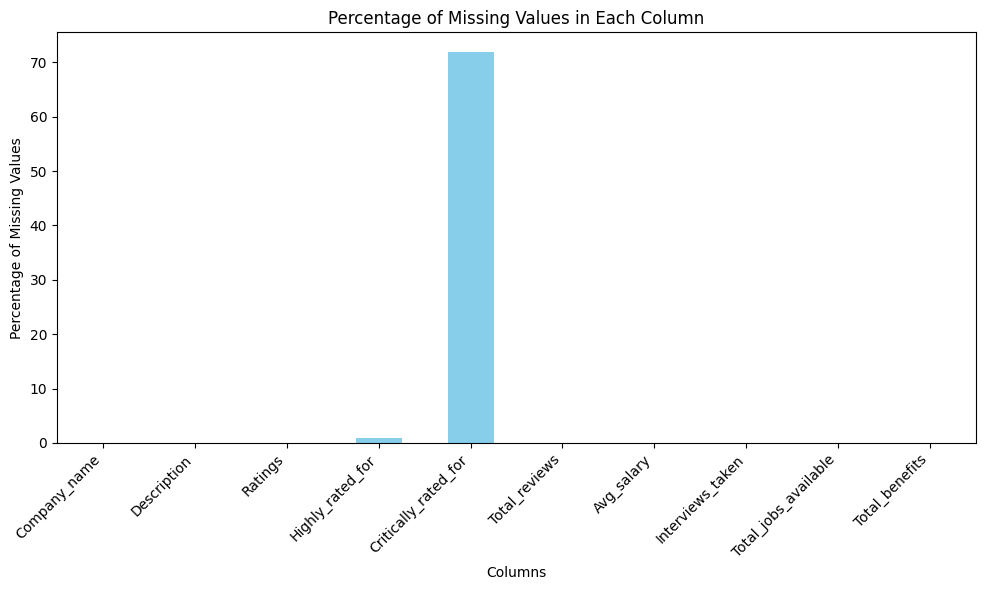

In [92]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### The above plot shows the visual representation percentage of missing values in each column.

# Handling missing values


In [93]:
# New category method for handling missing values
# This is done for categorical features

df['Highly_rated_for'].fillna('Unknown', inplace=True)
df['Critically_rated_for'].fillna('Not specified', inplace=True)

# Check if missing values are handled
print("Number of missing values in 'Highly_rated_for' column:", df['Highly_rated_for'].isnull().sum())
print("Number of missing values in 'Critically_rated_for' column:", df['Critically_rated_for'].isnull().sum())


Number of missing values in 'Highly_rated_for' column: 0
Number of missing values in 'Critically_rated_for' column: 0


### The method used to handle the missing values is imputation for categorical variables using the values "Unknown" and "Not specified"
### After cleaning,the data has no missing values

# Displaying the handled dataset for missing values

In [94]:
num_rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", num_rows_with_missing_values)
df.head()

Number of rows with missing values: 0


,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",Not specified,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


# Identifying Duplicates

In [95]:
# Find the number of records with duplicate values
num_duplicate_records = df.duplicated().sum()

print("Number of records with duplicate values:", num_duplicate_records)


Number of records with duplicate values: 641


### The number of records with duplicate values in the dataset  are : 641

# Handling duplicate values by removal

In [96]:
# Count the number of rows with duplicates
num_duplicates_before = df.duplicated().sum()

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Count the number of rows with duplicates after removal
num_duplicates_after = df_no_duplicates.duplicated().sum()

# Display the number of rows with duplicates before and after removal
print("Number of rows with duplicates before removal:", num_duplicates_before)
print("Number of rows with duplicates after removal:", num_duplicates_after)

Number of rows with duplicates before removal: 641
Number of rows with duplicates after removal: 0


### After handling the duplicates ,the number of duplicate values changed from 641 to 0

# Data transformation
# String Parsing

In [99]:
import pandas as pd
import numpy as np

# Function to convert strings like '856.9k' to float
def convert_to_float(x):
    if isinstance(x, str):
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
        elif 'm' in x:
            return float(x.replace('m', '')) * 1000000
        else:
            try:
                return float(x)
            except ValueError:
                return np.nan  # treat non-convertible strings as NaN
    return x

df = pd.read_csv('companies.csv')

df.fillna('', inplace=True)

cols_to_convert = ['Ratings', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits','Total_reviews']

for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_float)


# Print the first few rows of the cleaned DataFrame
print(df.head())


  Company_name                                        Description  Ratings  \
0          TCS  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1    Accenture  IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2    Cognizant  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3        Wipro  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4    Capgemini  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   

                                    Highly_rated_for  \
0                    Job Security, Work Life Balance   
1  Company Culture, Skill Development / Learning,...   
2                       Skill Development / Learning   
3                                       Job Security   
4  Job Security, Work Life Balance, Skill Develop...   

                        Critically_rated_for  Total_reviews  Avg_salary  \
0  Promotions / Appraisal, Salary & Benefits        73100.0    856900.0   
1                                           

In [100]:
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4000.0


# Outlier detection and handling

In [101]:
# Define numeric columns
numeric_columns = ['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']

# # Preprocess numeric columns
# for col in numeric_columns:
#     # Handle special characters like '--' for numeric columns
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# Perform column-wise outlier detection for numeric columns
def detect_outliers_z_score(data):
    threshold = 3 #standard value taken for majority of the datasets
    outliers = []
    for col in data.columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers.extend(data.index[z_scores > threshold])
    return list(set(outliers))

outliers_column_wise = detect_outliers_z_score(df[numeric_columns])

print("Column-wise outliers detected in numeric columns:", len(outliers_column_wise))



Column-wise outliers detected in numeric columns: 104


# Step 2: Exploratory Data Analysis(EDA)

# Descriptive statistics

In [140]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Use describe() to compute descriptive statistics
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)


            Ratings  Total_reviews     Avg_salary  Interviews_taken  \
count  10000.000000   10000.000000    9998.000000       9781.000000   
mean       3.894710     415.084500    2382.855271         25.612207   
std        0.385894    1626.985439   15836.034796        136.491758   
min        1.300000      72.000000       2.000000          1.000000   
25%        3.700000      97.000000     479.000000          4.000000   
50%        3.900000     148.000000     775.000000          8.000000   
75%        4.100000     295.000000    1500.000000         17.000000   
max        5.000000   73100.000000  856900.000000       6100.000000   

       Total_jobs_available  Total_benefits  
count           6077.000000     9921.000000  
mean              34.227909       53.982461  
std              172.260663      227.675982  
min                1.000000        1.000000  
25%                3.000000       11.000000  
50%                9.000000       19.000000  
75%               26.000000       39.0

# Finding the unique values from the Highly_rated_for column

In [ ]:
# Split the values in each cell and create a list of individual values
values_list = df['Highly_rated_for'].str.split(', ')

# Flatten the lists to create a single list containing all unique values
all_values = [value for sublist in values_list for value in sublist]

# Convert the list to a set to remove duplicates and then back to a list
unique_values = list(set(all_values))

print("Unique values in the column:", unique_values)

Unique values in the column: ['Work Satisfaction', 'Salary & Benefits', 'Company Culture', 'Skill Development / Learning', 'Promotions / Appraisal', 'Unknown', 'Job Security', 'Work Life Balance']


### From the above. we can find the unique value of the Highly_rated_for column.
### Using this we can know for what purpose the companies are highly rated

# Displaying the Highly_rated_for categories and companies belonging to them

In [ ]:
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",Not specified,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4000.0


In [ ]:
# Create a DataFrame to store companies for each unique value
companies_df = pd.DataFrame(index=range(len(unique_values)), columns=['Unique_Value', 'Companies'])

# Populate the DataFrame with unique values and corresponding companies
for i, value in enumerate(unique_values):
    companies = df[df['Highly_rated_for'].str.contains(value)]['Company_name'].tolist()
    companies_df.loc[i, 'Unique_Value'] = value
    companies_df.loc[i, 'Companies'] = ', '.join(companies)

# Export the DataFrame to an Excel file
companies_df.to_excel('companies_data.xlsx', index=False)

### The excel file gives us the companies that are highly rated for each category

### Using the excel file and by applying filters, we can know choose the company based on the needs

In [ ]:
# Split the values in each cell and create a list of individual values
values_list = df['Critically_rated_for'].str.split(', ')

# Flatten the lists to create a single list containing all unique values
all_values = [value for sublist in values_list for value in sublist]

# Convert the list to a set to remove duplicates and then back to a list
unique_values = list(set(all_values))

# Create a DataFrame to store companies for each unique value
companies_df = pd.DataFrame(index=range(len(unique_values)), columns=['Unique_Value', 'Companies'])

# Populate the DataFrame with unique values and corresponding companies
for i, value in enumerate(unique_values):
    companies = df[df['Critically_rated_for'].str.contains(value)]['Company_name'].tolist()
    companies_df.loc[i, 'Unique_Value'] = value
    companies_df.loc[i, 'Companies'] = ', '.join(companies)

# Export the DataFrame to an Excel file
companies_df.to_excel('companies_data_critically_rated_for.xlsx', index=False)

### Using these two excel files containing highly rated and critically rated, one can choose a company and check what are they highly and critically rated for, compare between the companies, etc

In [ ]:
print(df.dtypes)

Company_name             object
Description              object
Ratings                 float64
Highly_rated_for         object
Critically_rated_for     object
Total_reviews            object
Avg_salary              float64
Interviews_taken        float64
Total_jobs_available    float64
Total_benefits          float64
dtype: object


# Finding the average salaries of the companies under each description

In [135]:

#avg salaries of the companies lying under the catagory of description
import pandas as pd

file_path = 'cleaned_companies_dataset.csv'
df = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Company_analysis\\cleaned_companies_dataset.csv")

# Define a list of industries
industries = [
    'IT Services & Consulting',
    'Banking',
    'BPO',
    'Telecom',
    'Internet',
    'Retail',
    'NBFC',
    'Engineering',
    'EdTech',
    'Management Consulting',
    'Oil & Gas',
    'Automobile',
    'Insurance',
    'Financial Services',
    'Consumer Electronics & Appliances',
    'Chemicals',
    'Pharma',
    'Building Material',
    'FinTech',
    'Analytics & KPO',
    'Defence & Aerospace',
    'Iron & Steel',
    'Logistics',
    'FMCG',
    'Software Product',
    'Healthcare',
    'Industrial Automation',
    'Real Estate',
    'Accounting & Auditing',
    'Agriculture',
    'Agro Chemicals',
    'Architecture & Interior Design',
    'Auto Components',
    'Aviation',
    'Beauty & Personal Care',
    'Beverage',
    'Biotechnology',
    'Broadcasting',
    'Chemicals / Agri Inputs',
    'Design',
    'Education & Training',
    'Electrical Equipment',
    'Electronics Manufacturing',
    'Facility Management Services',
    'Fashion & Textile',
    'Fitness & Wellness',
    'Food Processing',
    'Furniture & Furnishing',
    'Government',
    'Hardware & Networking',
    'Hospitality',
    'Import & Export',
    'Industrial Machinery',
    'Investment Banking',
    'Jewellery',
    'Law Enforcement & Security',
    'Leather',
    'Legal',
    'Marketing & Advertising',
    'Media & Entertainment',
    'Medical Equipment',
    'Metals & Mining',
    'Non-Profit',
    'Packaging',
    'Petrochemicals',
    'Power',
    'Printing & Publishing',
    'Pulp & Paper',
    'Recruitment',
    'Semiconductors',
    'Sports & Recreation',
    'Travel & Tourism',
    'Urban Transport',
    'Waste Management'
]
average_salaries = {}

for industry in industries:
    filtered_df = df[df['Description'].str.contains(industry)]
    average_salary = filtered_df['Avg_salary'].mean()
    average_salaries[industry] = average_salary

sorted_average_salaries = dict(sorted(average_salaries.items(), key=lambda item: item[0]))

industries = list(sorted_average_salaries.keys())
avg_salaries = list(sorted_average_salaries.values())

# Print the average salaries for each industry
for industry, average_salary in sorted_average_salaries.items():
    print("Average salary of companies with description '{}': {}".format(industry, average_salary))



Average salary of companies with description 'Accounting & Auditing': 1315.5531914893618
Average salary of companies with description 'Agriculture': 662.4285714285714
Average salary of companies with description 'Agro Chemicals': 1361.402985074627
Average salary of companies with description 'Analytics & KPO': 2201.9411764705883
Average salary of companies with description 'Architecture & Interior Design': 871.258064516129
Average salary of companies with description 'Auto Components': 1688.25
Average salary of companies with description 'Automobile': 2713.1609195402298
Average salary of companies with description 'Aviation': 1534.725
Average salary of companies with description 'BPO': 3913.5263157894738
Average salary of companies with description 'Banking': 9397.823529411764
Average salary of companies with description 'Beauty & Personal Care': 901.4285714285714
Average salary of companies with description 'Beverage': 1650.0425531914893
Average salary of companies with description 'B

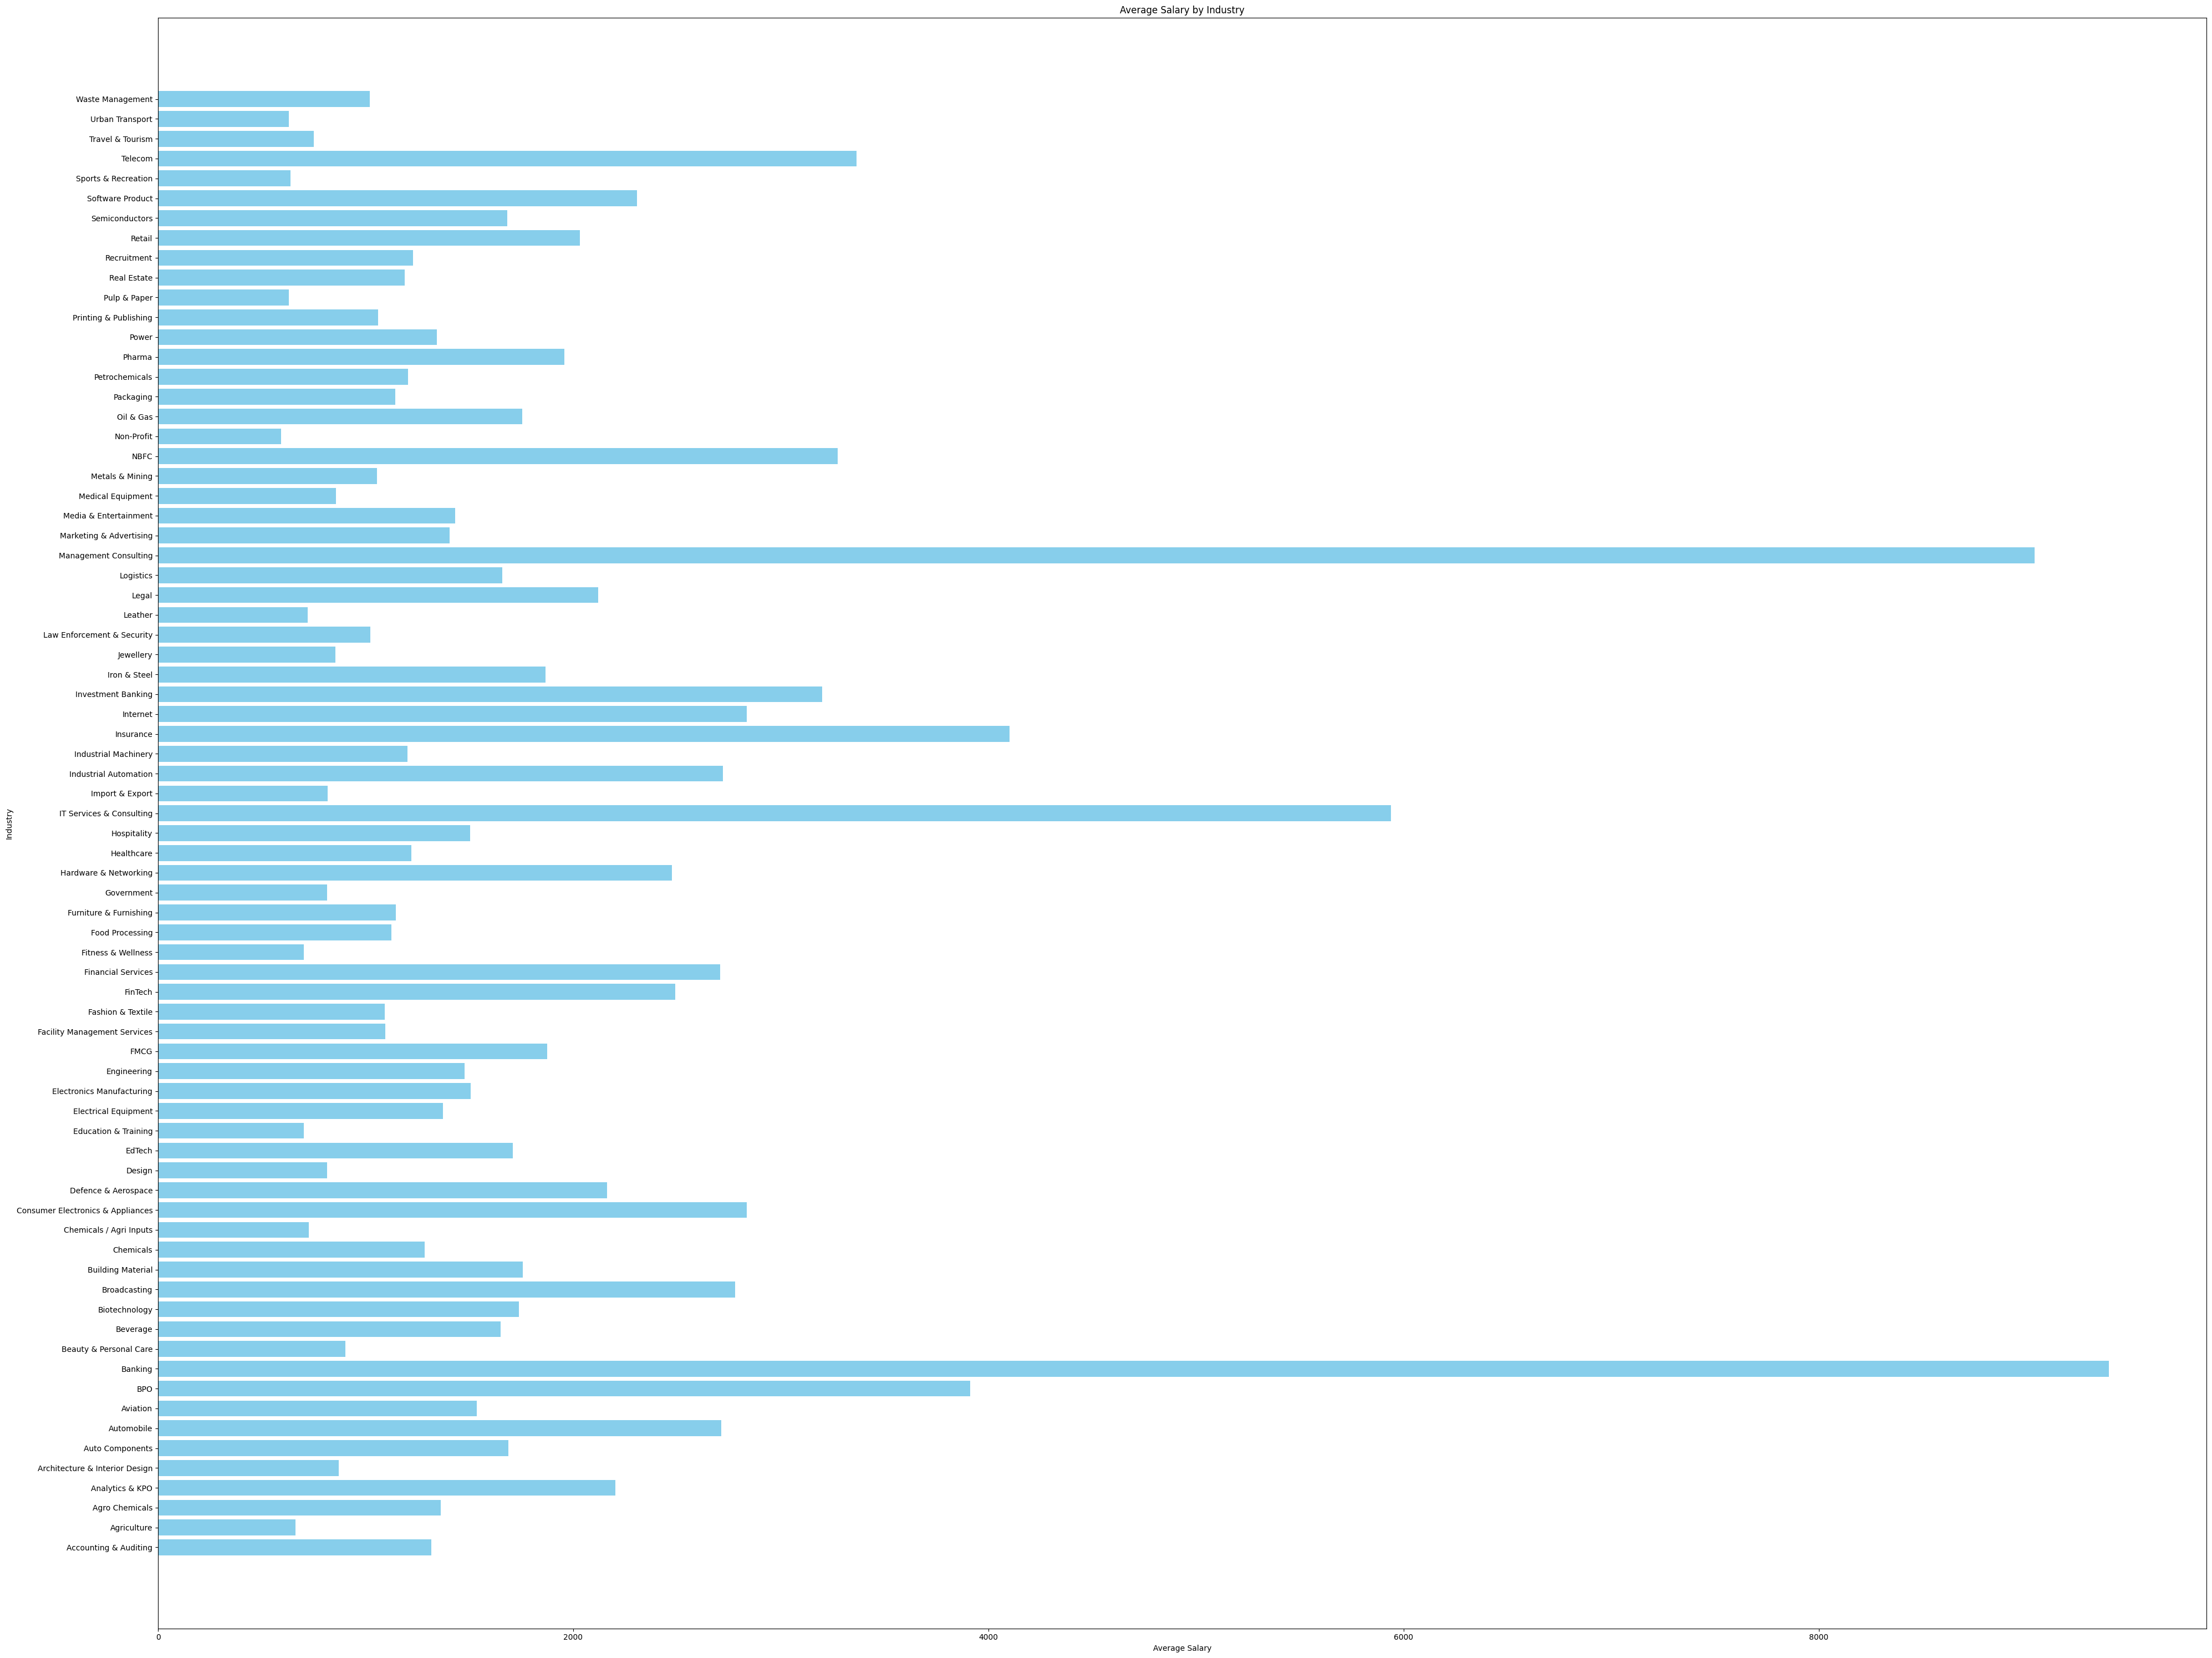

In [138]:
# Plotting the bar graph
plt.figure(figsize=(40, 30))
plt.barh(industries,avg_salaries, color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.title('Average Salary by Industry')
plt.tight_layout()
plt.show()


C:\Users\madhu\AppData\Local\Temp\ipykernel_15580\2546345242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


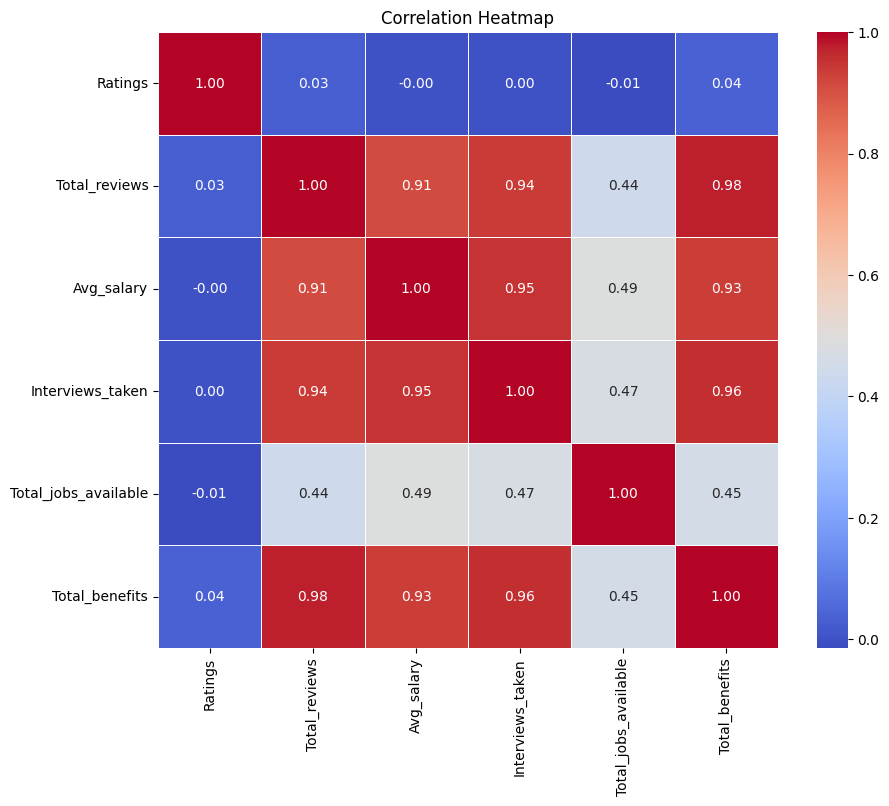

In [139]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [109]:


#To get the company with highest total_review and lowest total_review
import pandas as pd

file_path = 'cleaned_companies_dataset.csv'

df = pd.read_csv(file_path)

df_sorted = df.sort_values(by='Total_reviews', ascending=False)

highest_Total_reviews = df_sorted.iloc[0]
lowest_Total_reviews = df_sorted.iloc[-1]

print("Company with the highest Total_reviews:",highest_Total_reviews)
print("\nCompany with the lowest Total_reviews:",lowest_Total_reviews)


Company with the highest Total_reviews: Company_name                                                          TCS
Description             IT Services & Consulting | 1 Lakh+ Employees |...
Ratings                                                               3.8
Highly_rated_for                          Job Security, Work Life Balance
Critically_rated_for            Promotions / Appraisal, Salary & Benefits
Total_reviews                                                     73100.0
Avg_salary                                                       856900.0
Interviews_taken                                                   6100.0
Total_jobs_available                                                847.0
Total_benefits                                                    11500.0
Name: 0, dtype: object

Company with the lowest Total_reviews: Company_name                                                    Beroe Inc
Description             Management Consulting | 201-500 Employees | 19...
Ratings  

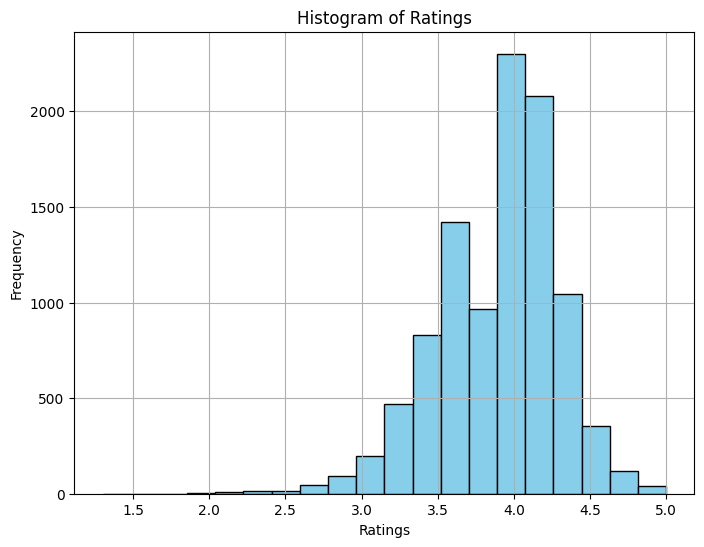

In [119]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = [ 'Ratings']

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

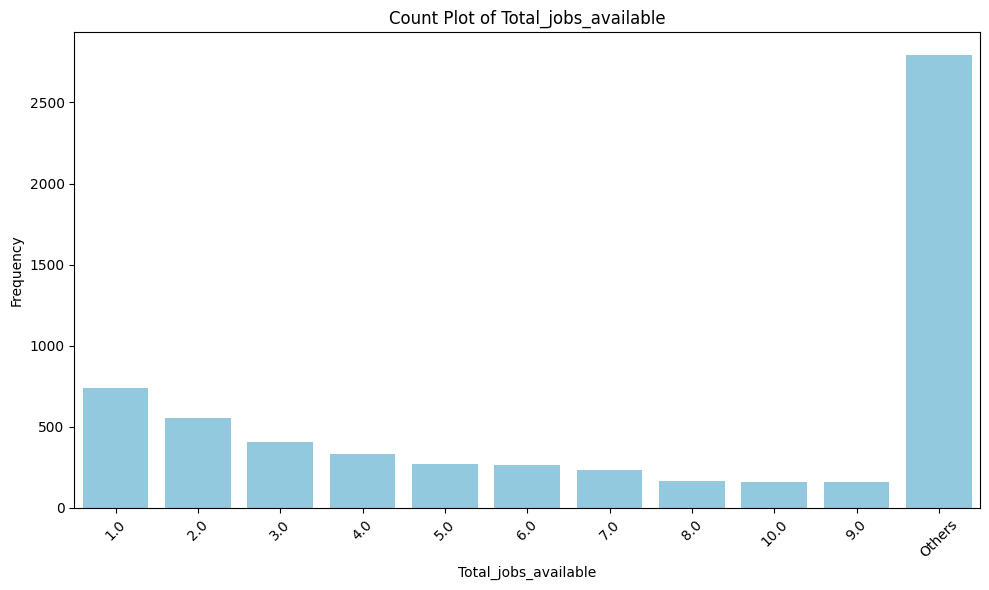

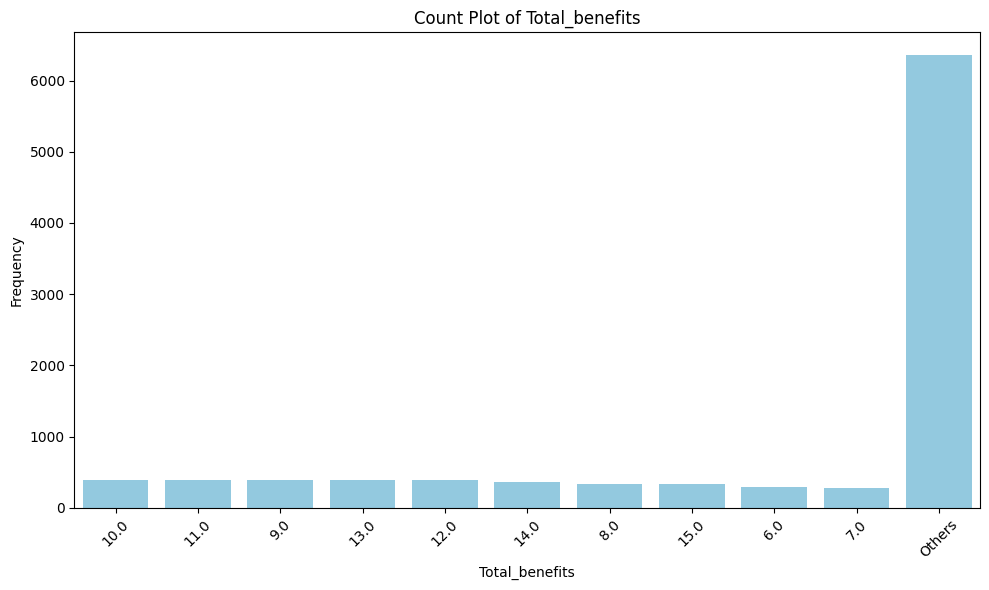

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns with high frequency of a single value
columns_with_single_value = ['Total_jobs_available', 'Total_benefits']  # Add other column names as needed

# Plot count plots for columns with single predominant value
for col in columns_with_single_value:
    plt.figure(figsize=(10, 6))  # Adjust figure size
    # Count occurrences of each value
    value_counts = df[col].value_counts()
    # Show top 10 most frequent values and group the rest as "Others"
    top_values = value_counts.nlargest(10)
    top_values['Others'] = value_counts.sum() - top_values.sum()
    # Create count plot
    sns.barplot(x=top_values.index, y=top_values.values, color='skyblue')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis tick labels
    plt.tight_layout()  # Adjust layout
    plt.show()



In [121]:
#TO GET THE COMANY WITH THE HIGHESTTOTAL_REVIEWS AND LOWEST TOTAL_REVIEWS


df_sorted = df.sort_values(by='Total_reviews', ascending=False)

highest_Total_reviews = df_sorted.iloc[0]
lowest_Total_reviews = df_sorted.iloc[-1]

print("Company with the highest Total_reviews:")
print("Company Name:", highest_Total_reviews['Company_name'])
print("Total Reviews:", highest_Total_reviews['Total_reviews'])

print("\nCompany with the lowest Total_reviews:")
print("Company Name:", lowest_Total_reviews['Company_name'])
print("Total Reviews:", lowest_Total_reviews['Total_reviews'])


Company with the highest Total_reviews:
Company Name: TCS
Total Reviews: 73100.0

Company with the lowest Total_reviews:
Company Name: Beroe Inc
Total Reviews: 72.0


In [125]:
#Getting the number of companies lying in each catagory of critically_rated_for

duplicate_descriptions = df.groupby('Critically_rated_for').filter(lambda x: len(x) > 1)

company_counts = duplicate_descriptions['Critically_rated_for'].value_counts()

for category, count in company_counts.items():
    print(f"Category: {category}, Number of Companies: {count}")

Category: Promotions / Appraisal, Number of Companies: 1304
Category: Promotions / Appraisal, Salary & Benefits, Number of Companies: 409
Category: Salary & Benefits, Promotions / Appraisal, Number of Companies: 120
Category: Job Security, Number of Companies: 75
Category: Job Security, Promotions / Appraisal, Number of Companies: 74
Category: Promotions / Appraisal, Job Security, Number of Companies: 71
Category: Promotions / Appraisal, Salary & Benefits, Work Satisfaction, Number of Companies: 63
Category: Salary & Benefits, Number of Companies: 53
Category: Promotions / Appraisal, Salary & Benefits, Company Culture, Number of Companies: 51
Category: Promotions / Appraisal, Salary & Benefits, Skill Development / Learning, Number of Companies: 37
Category: Promotions / Appraisal, Salary & Benefits, Job Security, Number of Companies: 26
Category: Promotions / Appraisal, Skill Development / Learning, Number of Companies: 23
Category: Promotions / Appraisal, Work Satisfaction, Number of 

In [126]:
#Getting the companies which lie in the same catagory of critically_rated_for
import pandas as pd

file_path = 'cleaned_companies_dataset.csv'

df = pd.read_csv(file_path)

duplicate_descriptions = df.groupby('Critically_rated_for').filter(lambda x: len(x) > 1)

for description, companies in duplicate_descriptions.groupby('Critically_rated_for'):
    print("Critically_rated_for: ", description)
    for index, row in companies.iterrows():
        print(row['Company_name'])
    print()

Critically_rated_for:  Company Culture
MSN Laboratories
Parle Products
Anthem Biosciences
Qualys
Suven Life Sciences
Arvind Techno Engineers
Ami Organics
PICL

Critically_rated_for:  Company Culture, Promotions / Appraisal, Salary & Benefits
NSH
Systech Solutions
Nelson Global Products

Critically_rated_for:  Company Culture, Promotions / Appraisal, Work Satisfaction
AGI Glaspac
AGI Glaspac
Flowserve Sanmar

Critically_rated_for:  Company Culture, Salary & Benefits, Work Life Balance
Pinnacle Infotech
Chain-Sys
SoCtronics Technologies

Critically_rated_for:  Company Culture, Work Life Balance, Work Satisfaction
Vedanta Resources
CtrlS

Critically_rated_for:  Company Culture, Work Satisfaction, Promotions / Appraisal
Haldia Petrochemicals
Khosla Profil

Critically_rated_for:  Company Culture, Work Satisfaction, Work Life Balance
MRF Tyres
Punjab & Sind Bank

Critically_rated_for:  Job Security
Udaan
Synechron
Huawei Technologies
Credit Suisse
EPAM Systems
Fluor Corporation
Bechtel
Amazo

In [129]:
#Getting the number of companies lying in each catagory of highly_rated_for


duplicate_descriptions = df.groupby('Highly_rated_for').filter(lambda x: len(x) > 1)

company_counts = duplicate_descriptions['Highly_rated_for'].value_counts()

for category, count in company_counts.items():
    print(f"Category: {category}, Number of Companies: {count}")

Category: Job Security, Number of Companies: 480
Category: Skill Development / Learning, Number of Companies: 303
Category: Job Security, Work Life Balance, Company Culture, Number of Companies: 286
Category: Work Life Balance, Number of Companies: 276
Category: Promotions / Appraisal, Number of Companies: 244
Category: Promotions / Appraisal, Salary & Benefits, Work Satisfaction, Number of Companies: 227
Category: Promotions / Appraisal, Salary & Benefits, Company Culture, Number of Companies: 213
Category: Job Security, Company Culture, Work Life Balance, Number of Companies: 204
Category: Promotions / Appraisal, Salary & Benefits, Job Security, Number of Companies: 196
Category: Work Life Balance, Job Security, Company Culture, Number of Companies: 159
Category: Job Security, Skill Development / Learning, Company Culture, Number of Companies: 151
Category: Promotions / Appraisal, Salary & Benefits, Number of Companies: 151
Category: Promotions / Appraisal, Job Security, Salary & Ben

In [130]:
#Getting the companies which lie in the same catagory of highly_rated_for

duplicate_descriptions = df.groupby('Highly_rated_for').filter(lambda x: len(x) > 1)

for description, companies in duplicate_descriptions.groupby('Highly_rated_for'):
    print("highly_rated_for: ", description)
    for index, row in companies.iterrows():
        print(row['Company_name'])
    print()

highly_rated_for:  Company Culture
Persistent Systems
TTEC India
Hilti
Livpure
Evelyn Learning Systems
Acko General Insurance
National Collateral Management Services
RSWM
Polybond India
Mitsuba Sical
Unitech
Vayam Info Solutions
Indifi Technologies
CANTABIL RETAIL INDIA
Global Hospital Pune India
Radio Mirchi
Venkateshwar Hospital
Hi-Tech
Coverfox
Federal Mogul Powertrain
Sakura Autoparts
ZF Wabco
Bharat Broadband Network
ABT Maruti
Eduvanz
MeritTrac
Birla Shakti Cement
Aranca
Chassis Brakes International
Corpone Staffing Solutions
Hansa Direct
Cex Webuy Entertainment
MPPTCL
Urjanet Energy Solutions
Urjanet Energy Solutions
eSense Learning
Sleepwell
Sleepwell
Centurion University of Technology and Management
A.t.e. Enterprises
Sohan Lal Commodity Management
MyCar
Tide Water Oil
Tide Water Oil
Takahata Precision
Amrita Vidyalayam
Takahata Precision
IND-SPHINX PRECISION
Waah Jobs
Lot Mobiles
Steelcase Asia Pacific Holdings India
Academor
Kabra Extrusion Technik
Experian
Pricol Engineerin

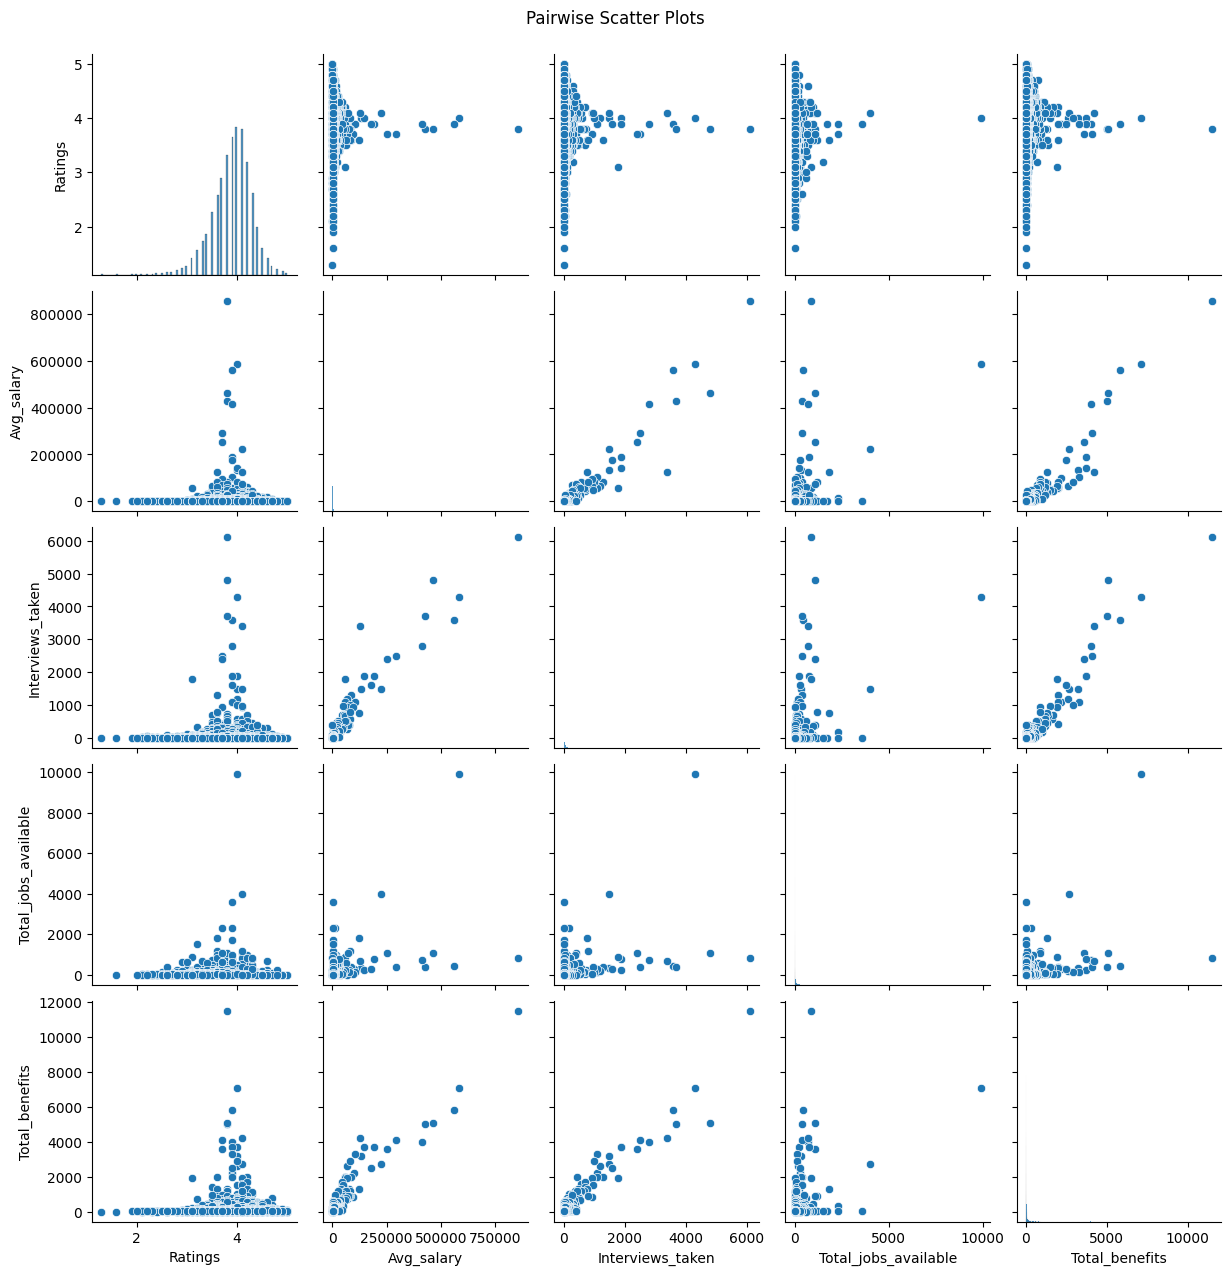

In [133]:

# Select numerical columns
numerical_cols = ['Ratings', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']

# Create pairplot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()
